In [1]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                # Run some setup code for this notebook.

import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
X = np.genfromtxt ('X32.csv', delimiter=",")
y = np.genfromtxt ('y32.csv', delimiter=",")

print X.shape

X = X.reshape(2000, 3, 32, 32).transpose(0,2,3,1).astype("float")
#X = a.reshape(349,3,32,32).swapaxes(0,2)
X_train = X[0:1500]
y_train = y[0:1500]
X_test = X[1500:]
y_test = y[1500:]

print 'Training data shape: ', X_train.shape
print 'Training labels shape: ', y_train.shape
print 'Test data shape: ', X_test.shape
print 'Test labels shape: ', y_test.shape


(2000, 3072)
Training data shape:  (1500, 32, 32, 3)
Training labels shape:  (1500,)
Test data shape:  (500, 32, 32, 3)
Test labels shape:  (500,)


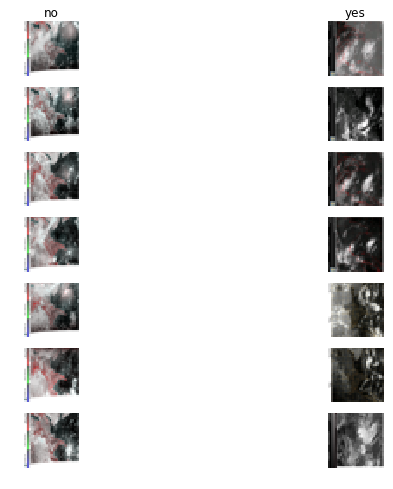

In [4]:
classes = ['no', 'yes']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [3]:
num_training = 1200
num_validation = 300
num_test = 500

# Our validation set will be num_validation points from the original
# training set.
mask = range(num_training, num_training + num_validation)
X_val = X_train[mask]
y_val = y_train[mask]

# Our training set will be the first num_train points from the original
# training set.
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

# We use the first num_test points of the original test set as our
# test set.
mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]

y_test[0:100] = 1;
y_test[400:] = 0;
y_val[0:50] = 1;
y_val[250:] = 0;

print 'Train data shape: ', X_train.shape
print 'Train labels shape: ', y_train.shape
print 'Validation data shape: ', X_val.shape
print 'Validation labels shape: ', y_val.shape
print 'Test data shape: ', X_test.shape
print 'Test labels shape: ', y_test.shape

Train data shape:  (1200, 32, 32, 3)
Train labels shape:  (1200,)
Validation data shape:  (300, 32, 32, 3)
Validation labels shape:  (300,)
Test data shape:  (500, 32, 32, 3)
Test labels shape:  (500,)


In [4]:
# Preprocessing: reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

# As a sanity check, print out the shapes of the data
print 'Training data shape: ', X_train.shape
print 'Validation data shape: ', X_val.shape
print 'Test data shape: ', X_test.shape

Training data shape:  (1200, 3072)
Validation data shape:  (300, 3072)
Test data shape:  (500, 3072)


[ 144.09833333  144.09833333  144.09833333  126.89666667  126.88916667
  126.8975       89.84333333   87.09916667   86.4725      142.39583333]


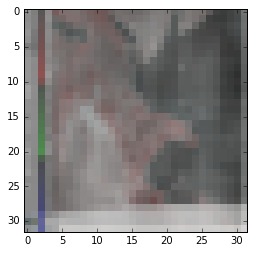

In [5]:
# Preprocessing: subtract the mean image
# first: compute the image mean based on the training data
mean_image = np.mean(X_train, axis=0)
print mean_image[:10] # print a few of the elements
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8')) # visualize the mean image

In [6]:
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image

In [7]:
# third: append the bias dimension of ones (i.e. bias trick) so that our SVM
# only has to worry about optimizing a single weight matrix W.
# Also, lets transform both data matrices so that each image is a column.
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))]).T
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))]).T
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))]).T

print X_train.shape, X_val.shape, X_test.shape

(3073, 1200) (3073, 300) (3073, 500)


In [8]:
# Evaluate the naive implementation of the loss we provided for you:
from cs231n.classifiers.linear_svm import svm_loss_naive
import time

# generate a random SVM weight matrix of small numbers
W = np.random.randn(10, 3073) * 0.0001 
loss, grad = svm_loss_naive(W, X_train, y_train, 0.00001)
print 'loss: %f' % (loss, )

cs231n/classifiers/linear_svm.py:25: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  correct_class_score = scores[y[i]]
cs231n/classifiers/linear_svm.py:35: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  dW[y[i],:] -= X[:,i].T # this is really a sum over j != y_i


loss: 11.780019


In [9]:
# Once you've implemented the gradient, recompute it with the code below
# and gradient check it with the function we provided for you

# Compute the loss and its gradient at W.
loss, grad = svm_loss_naive(W, X_train, y_train, 0.0)

# Numerically compute the gradient along several randomly chosen dimensions, and
# compare them with your analytically computed gradient. The numbers should match
# almost exactly along all dimensions.
from cs231n.gradient_check import grad_check_sparse
f = lambda w: svm_loss_naive(w, X_train, y_train, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

numerical: 246.981391 analytic: 246.977840, relative error: 7.189430e-06
numerical: 0.000000 analytic: 0.000000, relative error: 9.999745e-01
numerical: -155.156542 analytic: -155.156542, relative error: 1.728998e-11
numerical: 0.000000 analytic: 0.000000, relative error: 9.999880e-01
numerical: 0.000000 analytic: -0.000000, relative error: 1.000000e+00
numerical: 0.000000 analytic: 0.000000, relative error: 9.999829e-01
numerical: -0.000000 analytic: 0.000000, relative error: 1.000000e+00
numerical: 0.000000 analytic: -0.000000, relative error: 1.000000e+00
numerical: 0.000000 analytic: -0.000000, relative error: 1.000000e+00
numerical: -0.000000 analytic: 0.000000, relative error: 1.000000e+00


In [10]:
# Next implement the function svm_loss_vectorized; for now only compute the loss;
# we will implement the gradient in a moment.
tic = time.time()
loss_naive, grad_naive = svm_loss_naive(W, X_train, y_train, 0.00001)
toc = time.time()
print 'Naive loss: %e computed in %fs' % (loss_naive, toc - tic)

from cs231n.classifiers.linear_svm import svm_loss_vectorized
tic = time.time()
loss_vectorized, _ = svm_loss_vectorized(W, X_train, y_train.astype(int), 0.00001)
toc = time.time()
print 'Vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic)

# The losses should match but your vectorized implementation should be much faster.
print 'difference: %f' % (loss_naive - loss_vectorized)

Naive loss: 1.178002e+01 computed in 0.217302s
Vectorized loss: 1.178002e+01 computed in 0.033153s
difference: 0.000000


In [11]:
# Complete the implementation of svm_loss_vectorized, and compute the gradient
# of the loss function in a vectorized way.

# The naive implementation and the vectorized implementation should match, but
# the vectorized version should still be much faster.
tic = time.time()
_, grad_naive = svm_loss_naive(W, X_train, y_train.astype(int), 0.00001)
toc = time.time()
print 'Naive loss and gradient: computed in %fs' % (toc - tic)

tic = time.time()
_, grad_vectorized = svm_loss_vectorized(W, X_train, y_train.astype(int), 0.00001)
toc = time.time()
print 'Vectorized loss and gradient: computed in %fs' % (toc - tic)

# The loss is a single number, so it is easy to compare the values computed
# by the two implementations. The gradient on the other hand is a matrix, so
# we use the Frobenius norm to compare them. 
difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print 'difference: %f' % difference

Naive loss and gradient: computed in 0.184931s
Vectorized loss and gradient: computed in 0.013136s
difference: 0.000000


In [12]:
# Now implement SGD in LinearSVM.train() function and run it with the code below
from cs231n.classifiers import LinearSVM
svm = LinearSVM()
tic = time.time()
loss_hist = svm.train(X_train, y_train.astype(int), learning_rate=1e-7, reg=5e4,
                      num_iters=1500, verbose=True)
toc = time.time()
print 'That took %fs' % (toc - tic)

iteration 0 / 1500: loss 158.336471
iteration 100 / 1500: loss 57.210672
iteration 200 / 1500: loss 20.995911
iteration 300 / 1500: loss 7.708299
iteration 400 / 1500: loss 2.833017
iteration 500 / 1500: loss 1.044441
iteration 600 / 1500: loss 0.387878
iteration 700 / 1500: loss 0.147207
iteration 800 / 1500: loss 0.059228
iteration 900 / 1500: loss 0.026974
iteration 1000 / 1500: loss 0.014560
iteration 1100 / 1500: loss 0.010640
iteration 1200 / 1500: loss 0.008846
iteration 1300 / 1500: loss 0.008461
iteration 1400 / 1500: loss 0.008641
That took 6.129837s


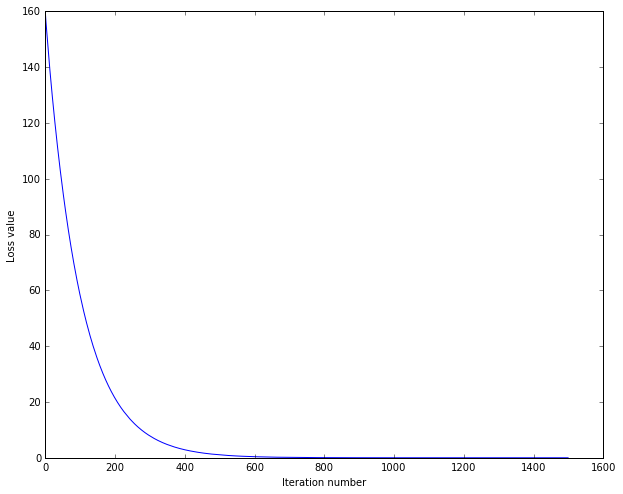

In [15]:
# A useful debugging strategy is to plot the loss as a function of
# iteration number:
plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')

In [13]:
# Write the LinearSVM.predict function and evaluate the performance on both the
# training and validation set
y_train_pred = svm.predict(X_train)
print 'training accuracy: %f' % (np.mean(y_train == y_train_pred), )
y_val_pred = svm.predict(X_val)
print 'validation accuracy: %f' % (np.mean(y_val == y_val_pred), )

training accuracy: 1.000000
validation accuracy: 0.833333


In [14]:
# Use the validation set to tune hyperparameters (regularization strength and
# learning rate). You should experiment with different ranges for the learning
# rates and regularization strengths; if you are careful you should be able to
# get a classification accuracy of about 0.4 on the validation set.
learning_rates = [1e-7, 2e-7, 3e-7, 5e-5, 8e-7, 8e-8, 9e-9, 10e-10, 11e-11, 12e-12]
regularization_strengths = [1e4, 2e4, 3e4, 4e4, 5e4, 6e4, 7e4, 8e4, 1e5]

# results is dictionary mapping tuples of the form
# (learning_rate, regularization_strength) to tuples of the form
# (training_accuracy, validation_accuracy). The accuracy is simply the fraction
# of data points that are correctly classified.
results = {}
best_val = -1   # The highest validation accuracy that we have seen so far.
best_svm = None # The LinearSVM object that achieved the highest validation rate.

################################################################################
# Write code that chooses the best hyperparameters by tuning on the validation #
# set. For each combination of hyperparameters, train a linear SVM on the      #
# training set, compute its accuracy on the training and validation sets, and  #
# store these numbers in the results dictionary. In addition, store the best   #
# validation accuracy in best_val and the LinearSVM object that achieves this  #
# accuracy in best_svm.                                                        #
#                                                                              #
# Hint: You should use a small value for num_iters as you develop your         #
# validation code so that the SVMs don't take much time to train; once you are #
# confident that your validation code works, you should rerun the validation   #
# code with a larger value for num_iters.                                      #
################################################################################

iters = 20 #100 #2000 intaially
for lr in learning_rates:
    for rs in regularization_strengths:
        svm = LinearSVM()
        svm.train(X_train, y_train.astype(int), learning_rate=lr, reg=rs, num_iters=iters)
        
        y_train_pred = svm.predict(X_train)
        acc_train = np.mean(y_train == y_train_pred)
        y_val_pred = svm.predict(X_val)
        acc_val = np.mean(y_val == y_val_pred)
        
        results[(lr, rs)] = (acc_train, acc_val)
        
        if best_val < acc_val:
            best_val = acc_val
            best_svm = svm
    
# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print 'lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy)
    
print 'best validation accuracy achieved during cross-validation: %f' % best_val

lr 1.200000e-11 reg 1.000000e+04 train accuracy: 0.890000 val accuracy: 0.783333
lr 1.200000e-11 reg 2.000000e+04 train accuracy: 0.252500 val accuracy: 0.350000
lr 1.200000e-11 reg 3.000000e+04 train accuracy: 0.120833 val accuracy: 0.196667
lr 1.200000e-11 reg 4.000000e+04 train accuracy: 0.292500 val accuracy: 0.336667
lr 1.200000e-11 reg 5.000000e+04 train accuracy: 0.937500 val accuracy: 0.796667
lr 1.200000e-11 reg 6.000000e+04 train accuracy: 0.669167 val accuracy: 0.660000
lr 1.200000e-11 reg 7.000000e+04 train accuracy: 0.550833 val accuracy: 0.516667
lr 1.200000e-11 reg 8.000000e+04 train accuracy: 0.215833 val accuracy: 0.306667
lr 1.200000e-11 reg 1.000000e+05 train accuracy: 0.502500 val accuracy: 0.490000
lr 1.100000e-10 reg 1.000000e+04 train accuracy: 0.605833 val accuracy: 0.626667
lr 1.100000e-10 reg 2.000000e+04 train accuracy: 0.532500 val accuracy: 0.516667
lr 1.100000e-10 reg 3.000000e+04 train accuracy: 0.715000 val accuracy: 0.656667
lr 1.100000e-10 reg 4.000000

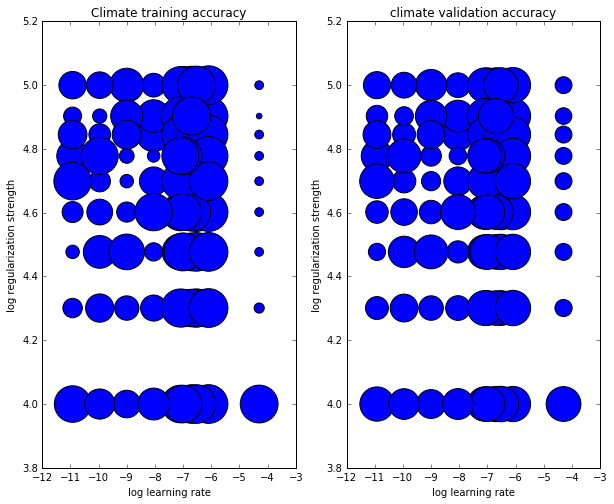

In [15]:
# Visualize the cross-validation results
import math
x_scatter = [math.log10(x[0]) for x in results]
y_scatter = [math.log10(x[1]) for x in results]

# plot training accuracy
sz = [results[x][0]*1500 for x in results] # default size of markers is 20
plt.subplot(1,2,1)
plt.scatter(x_scatter, y_scatter, sz)
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
#plt.title('CIFAR-10 training accuracy')
plt.title('Climate training accuracy')


# plot validation accuracy
sz = [results[x][1]*1500 for x in results] # default size of markers is 20
plt.subplot(1,2,2)
plt.scatter(x_scatter, y_scatter, sz)
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
#plt.title('CIFAR-10 validation accuracy')
plt.title('climate validation accuracy')

In [16]:
# Evaluate the best svm on test set
y_test_pred = best_svm.predict(X_test)
test_accuracy = np.mean(y_test == y_test_pred)
print 'linear SVM on raw pixels final test set accuracy: %f' % test_accuracy

linear SVM on raw pixels final test set accuracy: 0.810000


In [17]:
# Visualize the learned weights for each class.
# Depending on your choice of learning rate and regularization strength, these may
# or may not be nice to look at.

"""w = best_svm.W[:,:-1] # strip out the bias
w = w.reshape(2, 32, 32, 3)
w_min, w_max = np.min(w), np.max(w)
classes = ['no', 'yes']
for i in xrange(2):
  plt.subplot(2, 1, i + 1)
    
  # Rescale the weights to be between 0 and 255
  wimg = 255.0 * (w[i].squeeze() - w_min) / (w_max - w_min)
  plt.imshow(wimg.astype('uint8'))
  plt.axis('off')
  plt.title(classes[i])
"""

"w = best_svm.W[:,:-1] # strip out the bias\nw = w.reshape(2, 32, 32, 3)\nw_min, w_max = np.min(w), np.max(w)\nclasses = ['no', 'yes']\nfor i in xrange(2):\n  plt.subplot(2, 1, i + 1)\n    \n  # Rescale the weights to be between 0 and 255\n  wimg = 255.0 * (w[i].squeeze() - w_min) / (w_max - w_min)\n  plt.imshow(wimg.astype('uint8'))\n  plt.axis('off')\n  plt.title(classes[i])\n"

In [18]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_test_pred)
cnf_matrix

array([[213,  46],
       [ 49, 192]])